In [1]:
import keras 
from keras.models import Sequential
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Activation,Flatten,Dropout,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from tqdm.auto import tqdm
import shutil

In [3]:
import kaggle

In [5]:
!md "C:\Users\PRASAD\.kaggle\"

!copy kaggle.json C:\Users\PRASAD\.kaggle\


A subdirectory or file C:\Users\PRASAD\.kaggle\ already exists.


The system cannot find the file specified.


In [8]:
!copy kaggle.json "C:\PRASAD wORKS\AI & Computer Visiom Works\kaggle.json"

The system cannot find the file specified.


In [9]:
! kaggle competitions download -c dogs-vs-cats


  0%|          | 0.00/812M [00:00<?, ?B/s]
  0%|          | 1.00M/812M [00:01<20:36, 688kB/s]
  0%|          | 2.00M/812M [00:01<10:04, 1.40MB/s]
  0%|          | 3.00M/812M [00:01<06:13, 2.27MB/s]
  0%|          | 4.00M/812M [00:01<04:22, 3.23MB/s]
  1%|          | 6.00M/812M [00:02<02:49, 4.99MB/s]
  1%|          | 7.00M/812M [00:02<03:03, 4.60MB/s]
  1%|          | 8.00M/812M [00:02<02:55, 4.79MB/s]
  1%|          | 9.00M/812M [00:02<02:41, 5.22MB/s]
  1%|          | 10.0M/812M [00:03<03:07, 4.48MB/s]
  1%|▏         | 11.0M/812M [00:03<02:46, 5.03MB/s]
  1%|▏         | 12.0M/812M [00:03<02:33, 5.46MB/s]
  2%|▏         | 13.0M/812M [00:03<02:22, 5.90MB/s]
  2%|▏         | 14.0M/812M [00:03<02:11, 6.37MB/s]
  2%|▏         | 15.0M/812M [00:03<02:06, 6.59MB/s]
  2%|▏         | 16.0M/812M [00:04<02:16, 6.10MB/s]
  2%|▏         | 18.0M/812M [00:04<01:54, 7.28MB/s]
  2%|▏         | 19.0M/812M [00:04<01:50, 7.51MB/s]
  2%|▏         | 20.0M/812M [00:04<01:54, 7.26MB/s]
  3%|▎         | 22.0

In [10]:
! unzip -q dogs-vs-cats.zip
! unzip -q train.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [11]:
! unzip -q dogs-vs-cats.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [12]:
#Making folders and subfolders 
os.mkdir("images")
os.mkdir("images/dog")
os.mkdir("images/cat")
os.mkdir("test")

In [13]:
source = "train/"
dest_cat = "images/cat/"
dest_dog = "images/dog/"

for imageName in tqdm(os.listdir(source)):
  if imageName.startswith("dog"):
    shutil.copy(source + imageName, dest_dog)
  elif imageName.startswith("cat"):
    shutil.copy(source + imageName, dest_cat)

  0%|          | 0/25000 [00:00<?, ?it/s]

In [14]:
len(os.listdir(dest_dog)), len(os.listdir(dest_cat))

(12500, 12500)

In [15]:
#Test data set
test_dog = np.random.choice(os.listdir(dest_dog), 500, replace=False)
test_cat = np.random.choice(os.listdir(dest_cat), 500, replace=False)

for imageName in test_dog:
  shutil.move(dest_dog + imageName, "test/")
for imageName in test_cat:
  shutil.move(dest_cat + imageName, "test/")

In [16]:
len(os.listdir(dest_dog)), len(os.listdir(dest_cat))

(12000, 12000)

In [17]:
len(os.listdir("test/"))

1000

Data Augmentation and Preprocessing

In [18]:
#Image Data Generator

idg = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                                                      rotation_range=30,
                                                      rescale=1/255.0,
                                                      validation_split=0.1)

In [19]:
batch_size = 64

In [20]:
train_idg = idg.flow_from_directory("images",target_size=(150,150),
                                    batch_size = batch_size,
                                    subset="training")

Found 21600 images belonging to 2 classes.


In [21]:
val_idg = idg.flow_from_directory("images", target_size=(150, 150),
                                  batch_size = batch_size,
                                  subset="validation")

Found 2400 images belonging to 2 classes.


Model Building

In [23]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input((150,150,3),name="Input"))

model.add(tf.keras.layers.Conv2D(filters=16,
                                 kernel_size=(3,3),
                                 padding="valid",
                                 strides=(1,1),
                                 activation="relu",
                                 name="Conv1"))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),
                                       strides =(2,2),
                                       padding="valid",
                                       name="Pool1"))

model.add(tf.keras.layers.Conv2D(filters=32,
                                 kernel_size=(3,3),
                                 padding="valid",
                                 strides=(1,1),
                                 activation="relu",
                                 name="Conv2"))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),
                                       strides=(2,2),
                                       padding="valid",
                                       name="Pool2"))

model.add(tf.keras.layers.Conv2D(filters=32,
                                 kernel_size=(3,3),
                                 padding="valid",
                                 strides=(1,1),
                                 activation="relu",
                                 name="Conv3"))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),
                                       strides=(2,2),
                                       padding="valid",
                                       name="Pool3"))

model.add(tf.keras.layers.Flatten(name="Flat"))
model.add(tf.keras.layers.Dense(64, activation="relu", name="Dense1"))
model.add(tf.keras.layers.Dense(2, activation="softmax", name="Output"))




In [24]:
#Original Image
150 * 150 * 3

67500

In [25]:
# Conv Image
17 * 17 * 32

9248

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 148, 148, 16)      448       
                                                                 
 Pool1 (MaxPooling2D)        (None, 74, 74, 16)        0         
                                                                 
 Conv2 (Conv2D)              (None, 72, 72, 32)        4640      
                                                                 
 Pool2 (MaxPooling2D)        (None, 36, 36, 32)        0         
                                                                 
 Conv3 (Conv2D)              (None, 34, 34, 32)        9248      
                                                                 
 Pool3 (MaxPooling2D)        (None, 17, 17, 32)        0         
                                                                 
 Flat (Flatten)              (None, 9248)             

In [27]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics = ["acc"])

In [28]:
model.fit(train_idg, epochs=10, batch_size=batch_size, validation_data=val_idg)

Epoch 1/10


338/338 [==============================] - 132s 386ms/step - loss: 0.6811 - acc: 0.5646 - val_loss: 0.6685 - val_acc: 0.6054
Epoch 2/10
338/338 [==============================] - 105s 310ms/step - loss: 0.6600 - acc: 0.6075 - val_loss: 0.6670 - val_acc: 0.5717
Epoch 3/10
338/338 [==============================] - 107s 315ms/step - loss: 0.6379 - acc: 0.6356 - val_loss: 0.6200 - val_acc: 0.6525
Epoch 4/10
338/338 [==============================] - 106s 315ms/step - loss: 0.6066 - acc: 0.6710 - val_loss: 0.5887 - val_acc: 0.6921
Epoch 5/10
338/338 [==============================] - 104s 307ms/step - loss: 0.5818 - acc: 0.6957 - val_loss: 0.5705 - val_acc: 0.7129
Epoch 6/10
338/338 [==============================] - 107s 317ms/step - loss: 0.5641 - acc: 0.7100 - val_loss: 0.5456 - val_acc: 0.7312
Epoch 7/10
338/338 [==============================] - 105s 310ms/step - loss: 0.5528 - acc: 0.7193 - val_loss: 0.5310 - val_acc: 0.7392
Epoch 8/10
338/338 [==========================

(1, 150, 150, 3)

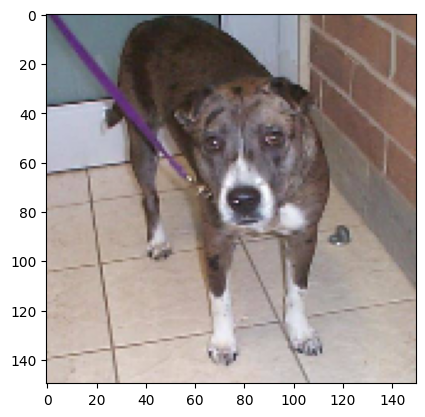

In [34]:
#Images in Test
test_image = "test/dog.1378.jpg"
test_image = cv2.imread(test_image)
test_image = cv2.resize(test_image,(150,150))
test_image = cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
test_image = test_image/ 255.0
test_image.shape

In [35]:
model.predict(test_image)

1/1 [==============================] - 0s 99ms/step


array([[0.6094005 , 0.39059952]], dtype=float32)

In [36]:
train_idg.class_indices

{'cat': 0, 'dog': 1}

In [37]:
test_results = {}
for imageName in tqdm(os.listdir("test/")):
  test_image = "test/" + imageName
  test_image = cv2.imread(test_image)
  test_image = cv2.resize(test_image, (150, 150))
  test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
  # plt.imshow(test_image)
  test_image = np.expand_dims(test_image, axis=0)
  test_image = test_image / 255.0
  result = model.predict(test_image)
  test_results[imageName] = result

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 29ms/step


In [38]:
test_results

{'cat.10004.jpg': array([[0.74970704, 0.25029296]], dtype=float32),
 'cat.10008.jpg': array([[0.6011451, 0.3988549]], dtype=float32),
 'cat.10020.jpg': array([[0.5504871 , 0.44951287]], dtype=float32),
 'cat.10048.jpg': array([[0.5060817, 0.4939183]], dtype=float32),
 'cat.10064.jpg': array([[0.4539929 , 0.54600716]], dtype=float32),
 'cat.10073.jpg': array([[0.4819986, 0.5180013]], dtype=float32),
 'cat.10105.jpg': array([[0.9094673 , 0.09053269]], dtype=float32),
 'cat.10116.jpg': array([[0.3404515, 0.6595485]], dtype=float32),
 'cat.10124.jpg': array([[0.76303834, 0.2369616 ]], dtype=float32),
 'cat.10176.jpg': array([[0.67326987, 0.32673013]], dtype=float32),
 'cat.10183.jpg': array([[0.5330845 , 0.46691552]], dtype=float32),
 'cat.10200.jpg': array([[0.4392954, 0.5607046]], dtype=float32),
 'cat.10238.jpg': array([[0.87827766, 0.12172233]], dtype=float32),
 'cat.1027.jpg': array([[0.5351349 , 0.46486515]], dtype=float32),
 'cat.10279.jpg': array([[0.8013767 , 0.19862325]], dtype=f

In [39]:
X_test = []
for imageName in tqdm(os.listdir("test/")):
  test_image = "test/" + imageName
  test_image = cv2.imread(test_image)
  test_image = cv2.resize(test_image, (150, 150))
  test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
  # plt.imshow(test_image)
  # test_image = np.expand_dims(test_image, axis=0)
  test_image = test_image / 255.0
  X_test.append(test_image)
X_test = np.array(X_test)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [40]:
X_test.shape

(1000, 150, 150, 3)

In [41]:
model.predict(X_test)

32/32 [==============================] - 0s 11ms/step


array([[0.74970704, 0.25029296],
       [0.6011451 , 0.3988549 ],
       [0.5504871 , 0.44951284],
       ...,
       [0.71598244, 0.28401753],
       [0.6327611 , 0.36723882],
       [0.50294256, 0.49705747]], dtype=float32)